# Use Machine Learning in a Trading Strategy

## Loading and Preparing the Data

In [ ]:
# Import required libraries
import pandas as pd
from pathlib import Path

In [ ]:
# Import the OHLCV dataset into a Pandas Dataframe
trading_df = pd.read_csv(
    Path("/content/ohlcv.csv"), 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)
# Display sample data
trading_df.head()

,open,high,low,close,volume
date,,,,,
2018-10-19 09:30:00,16.90,17.18,16.90,17.095,11522
2018-10-19 09:45:00,17.11,17.44,17.11,17.400,70593
2018-10-19 10:00:00,17.40,17.40,17.25,17.280,38885
2018-10-19 10:15:00,17.27,17.27,17.18,17.200,37046
2018-10-19 10:30:00,17.21,17.37,17.19,17.200,46874


In [ ]:
# Calculate the daily returns using the closing prices and the pct_change function
trading_df["actual_returns"] = trading_df["close"].pct_change()
# Display sample data
trading_df.head()

,open,high,low,close,volume,actual_returns
date,,,,,,
2018-10-19 09:30:00,16.90,17.18,16.90,17.095,11522,NaN
2018-10-19 09:45:00,17.11,17.44,17.11,17.400,70593,0.017841
2018-10-19 10:00:00,17.40,17.40,17.25,17.280,38885,-0.006897
2018-10-19 10:15:00,17.27,17.27,17.18,17.200,37046,-0.004630
2018-10-19 10:30:00,17.21,17.37,17.19,17.200,46874,0.000000


In [ ]:
# Drop all NaN values from the DataFrame
trading_df = trading_df.dropna()

# Review the DataFrame
display(trading_df.head())
display(trading_df.tail())

,open,high,low,close,volume,actual_returns
date,,,,,,
2018-10-19 09:45:00,17.11,17.44,17.11,17.40,70593,0.017841
2018-10-19 10:00:00,17.40,17.40,17.25,17.28,38885,-0.006897
2018-10-19 10:15:00,17.27,17.27,17.18,17.20,37046,-0.004630
2018-10-19 10:30:00,17.21,17.37,17.19,17.20,46874,0.000000
2018-10-19 10:45:00,17.20,17.20,17.10,17.12,11266,-0.004651


,open,high,low,close,volume,actual_returns
date,,,,,,
2020-09-04 14:45:00,6.225,6.26,6.220,6.250,55512,0.003210
2020-09-04 15:00:00,6.255,6.27,6.245,6.250,65810,0.000000
2020-09-04 15:15:00,6.250,6.29,6.250,6.275,202630,0.004000
2020-09-04 15:30:00,6.270,6.28,6.250,6.255,130140,-0.003187
2020-09-04 15:45:00,6.250,6.28,6.250,6.250,190278,-0.000799


## Generating the Features and Target Sets

### Creating the Features Set

In [ ]:
# Define a window size of 4
short_window = 4
# Create an SMA that uses short_window, and assign it to a new column named “sma_fast”
trading_df["sma_fast"] = trading_df["close"].rolling(window=short_window).mean()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
import numpy as np

In [ ]:
# Define a window size of 100
long_window = 100
# Create an SMA that uses long_window, and assign it to a new columns named “sma_slow”
trading_df["sma_slow"] = trading_df["close"].rolling(window=long_window).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
trading_df["sma_fast_sqr"] = trading_df["close"].rolling(window=short_window).mean()**2
trading_df["sma_slow_sqr"] = np.square(trading_df["close"].rolling(window=long_window).mean())
trading_df["sma_fast_sin"] = np.sin(trading_df["close"].rolling(window=short_window).mean())
trading_df["sma_slow_sin"] = np.sin(trading_df["close"].rolling(window=long_window).mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
# Drop the NaNs using dropna()
trading_df = trading_df.dropna()

In [ ]:
trading_df.head()

,open,high,low,close,volume,actual_returns,sma_fast,sma_slow,sma_fast_sqr,sma_slow_sqr,sma_fast_sin,sma_slow_sin
date,,,,,,,,,,,,
2018-10-24 15:00:00,15.66,15.66,15.600,15.615,80027,-0.002874,15.65250,16.3403,245.000756,267.005404,0.055435,-0.591031
2018-10-24 15:15:00,15.63,15.66,15.520,15.530,76449,-0.005443,15.61875,16.3216,243.945352,266.394627,0.089095,-0.575845
2018-10-24 15:30:00,15.54,15.54,15.180,15.410,137468,-0.007727,15.55375,16.3029,241.919139,265.784548,0.153603,-0.560456
2018-10-24 15:45:00,15.41,15.42,15.350,15.350,688995,-0.003894,15.47625,16.2844,239.514314,265.181683,0.229645,-0.545040
2018-10-25 09:30:00,15.55,15.55,15.205,15.320,44387,-0.001954,15.40250,16.2656,237.237006,264.569743,0.300735,-0.529182


In [ ]:
# Assign a copy of the `sma_fast` and `sma_slow` columns to a new DataFrame called `X`
X = trading_df[["sma_fast","sma_fast_sqr","sma_fast_sin","sma_slow","sma_slow_sqr","sma_slow_sin" ]].shift().dropna().copy()
# Display sample data
display(X.head())
display(X.tail())

,sma_fast,sma_fast_sqr,sma_fast_sin,sma_slow,sma_slow_sqr,sma_slow_sin
date,,,,,,
2018-10-24 15:15:00,15.65250,245.000756,0.055435,16.3403,267.005404,-0.591031
2018-10-24 15:30:00,15.61875,243.945352,0.089095,16.3216,266.394627,-0.575845
2018-10-24 15:45:00,15.55375,241.919139,0.153603,16.3029,265.784548,-0.560456
2018-10-25 09:30:00,15.47625,239.514314,0.229645,16.2844,265.181683,-0.545040
2018-10-25 09:45:00,15.40250,237.237006,0.300735,16.2656,264.569743,-0.529182


,sma_fast,sma_fast_sqr,sma_fast_sin,sma_slow,sma_slow_sqr,sma_slow_sin
date,,,,,,
2020-09-04 14:45:00,6.22625,38.766189,-0.056905,6.27210,39.339238,-0.011085
2020-09-04 15:00:00,6.22875,38.797327,-0.054408,6.27030,39.316662,-0.012885
2020-09-04 15:15:00,6.23875,38.922002,-0.044421,6.26985,39.311019,-0.013335
2020-09-04 15:30:00,6.25125,39.078127,-0.031930,6.26910,39.301615,-0.014085
2020-09-04 15:45:00,6.25750,39.156306,-0.025682,6.26855,39.294719,-0.014635


### Creating the Target Set

In [ ]:
# Create a new column in the `trading_df` called "signal" setting its value to zero.
trading_df["signal"] = 0.0
trading_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,open,high,low,close,volume,actual_returns,sma_fast,sma_slow,sma_fast_sqr,sma_slow_sqr,sma_fast_sin,sma_slow_sin,signal
date,,,,,,,,,,,,,
2018-10-24 15:00:00,15.66,15.66,15.600,15.615,80027,-0.002874,15.65250,16.3403,245.000756,267.005404,0.055435,-0.591031,0.0
2018-10-24 15:15:00,15.63,15.66,15.520,15.530,76449,-0.005443,15.61875,16.3216,243.945352,266.394627,0.089095,-0.575845,0.0
2018-10-24 15:30:00,15.54,15.54,15.180,15.410,137468,-0.007727,15.55375,16.3029,241.919139,265.784548,0.153603,-0.560456,0.0
2018-10-24 15:45:00,15.41,15.42,15.350,15.350,688995,-0.003894,15.47625,16.2844,239.514314,265.181683,0.229645,-0.545040,0.0
2018-10-25 09:30:00,15.55,15.55,15.205,15.320,44387,-0.001954,15.40250,16.2656,237.237006,264.569743,0.300735,-0.529182,0.0


In [ ]:
# Create the signal to buy
trading_df.loc[(trading_df["actual_returns"] >= 0), "signal"] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
# Create the signal to sell
trading_df.loc[(trading_df["actual_returns"] < 0), "signal"] = -1

In [ ]:
# Copy the new "signal" column to a new Series called `y`.
y = trading_df["signal"].copy()

## Split the Data into Training and Testing Sets

In [ ]:
# Import required libraries
from pandas.tseries.offsets import DateOffset

In [ ]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2018-10-24 15:15:00


In [ ]:
# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=3)

# Display the training end date
print(training_end)

2019-01-24 15:15:00


In [ ]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

In [ ]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end:]
y_test = y.loc[training_end:]

## Standardize the Data

In [ ]:
# Import required libraries
from sklearn.preprocessing import StandardScaler

In [ ]:
# Create a StandardScaler instance
scaler = StandardScaler()
 
# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)
 
# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

---

## Using Machine Learning Into a Trading Strategy

In [ ]:
# Import the SVM model
from sklearn import svm
from sklearn.metrics import classification_report

In [ ]:
# Create the classifier model
svm_model = svm.SVC() 
# Fit the model to the data using X_train_scaled and y_train
svm_model = svm_model.fit(X_train_scaled, y_train)
# Use the trained model to predict the trading signals for the training data
training_signal_predictions = svm_model.predict(X_train_scaled)
# Display the sample predictions
training_signal_predictions[:10]

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [ ]:
# Evaluate the model using a classification report
training_report = classification_report(y_train, training_signal_predictions)
# Display the report
print(training_report)

              precision    recall  f1-score   support

        -1.0       0.53      0.19      0.27       740
         1.0       0.52      0.84      0.64       777

    accuracy                           0.52      1517
   macro avg       0.52      0.51      0.46      1517
weighted avg       0.52      0.52      0.46      1517



### Backtesting a Machine Learning Trading Algorithm

In [ ]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_predictions = svm_model.predict(X_test_scaled)

In [ ]:
# Evaluate the model's ability to predict the trading signal for the testing data
testing_report = classification_report(y_test, testing_signal_predictions)

# Display the report
print(testing_report)

              precision    recall  f1-score   support

        -1.0       0.48      0.01      0.02      4894
         1.0       0.53      0.99      0.69      5558

    accuracy                           0.53     10452
   macro avg       0.51      0.50      0.36     10452
weighted avg       0.51      0.53      0.38     10452



### Visually Compare the Actual and Predicted Returns

In [ ]:
# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

predictions_df["predicted_signal"] = testing_signal_predictions

predictions_df["actual_returns"] = trading_df["actual_returns"]

predictions_df["trading_algorithm_returns"] = (predictions_df["actual_returns"] * predictions_df["predicted_signal"])

# Review the DataFrame
predictions_df

,predicted_signal,actual_returns,trading_algorithm_returns
date,,,
2019-01-24 15:15:00,1.0,0.001412,0.001412
2019-01-24 15:30:00,1.0,-0.001410,-0.001410
2019-01-24 15:45:00,1.0,-0.003531,-0.003531
2019-01-25 09:30:00,1.0,0.009922,0.009922
2019-01-25 09:45:00,1.0,0.002105,0.002105
...,...,...,...
2020-09-04 14:45:00,1.0,0.003210,0.003210
2020-09-04 15:00:00,1.0,0.000000,0.000000
2020-09-04 15:15:00,1.0,0.004000,0.004000


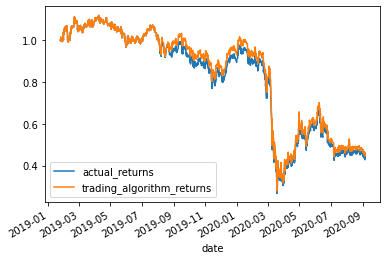

In [ ]:
# Calculate and plot the cumulative returns for the `actual_returns` and the `trading_algorithm_returns`
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()

## the following are enhancements to the original code
---
inspired by Tarek Atwan (https://github.com/tatwan) .\
and Madhuri Panwar



In [ ]:
# model evaluation
test_report = classification_report(y_test, testing_signal_predictions)
# Display the report
print(test_report)

              precision    recall  f1-score   support

        -1.0       0.48      0.01      0.02      4894
         1.0       0.53      0.99      0.69      5558

    accuracy                           0.53     10452
   macro avg       0.51      0.50      0.36     10452
weighted avg       0.51      0.53      0.38     10452



In [ ]:
def train_predict(learner, X_train, y_train, X_test, y_test):
    '''
    learner: the learning algorithm
    '''
    # fit the learner to the training data 
    learner=learner.fit(X_train, y_train)
    prediction_train=learner.predict(X_train)
    prediction_test=learner.predict(X_test)
    print('------------classification report of training data-----------')
    print(classification_report(y_train, prediction_train))
    print('------------classification report of testing data-----------')
    print(classification_report(y_test, prediction_test))


In [ ]:
from sklearn. linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC 

m_LR=LogisticRegression()
m_DT=DecisionTreeClassifier()
m_AB=AdaBoostClassifier()
m_RF=RandomForestClassifier()

In [ ]:
for model in [m_LR, m_DT, m_AB, m_RF]:
    model_name=model.__class__.__name__
    print(model_name)
    train_predict(model, X_train_scaled, y_train, X_test_scaled, y_test)

LogisticRegression
------------classification report of training data-----------
              precision    recall  f1-score   support

        -1.0       0.51      0.22      0.31       740
         1.0       0.52      0.80      0.63       777

    accuracy                           0.52      1517
   macro avg       0.52      0.51      0.47      1517
weighted avg       0.52      0.52      0.47      1517

------------classification report of testing data-----------
              precision    recall  f1-score   support

        -1.0       0.47      0.36      0.41      4894
         1.0       0.53      0.64      0.58      5558

    accuracy                           0.51     10452
   macro avg       0.50      0.50      0.50     10452
weighted avg       0.50      0.51      0.50     10452

DecisionTreeClassifier
------------classification report of training data-----------
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       740
         1

In [ ]:
!pip install tensorflow

In [ ]:
# import library for deep learning
import pandas as pd
#from path import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense 
from tensorflow.keras.models import Sequential

In [ ]:
# define the model 
number_inputs=6
hidden_nodes_layers1=80
hidden_nodes_layer2=40
# first hidden layer
nn=Sequential()
nn.add(Dense(units=hidden_nodes_layers1, input_dim=number_inputs, activation='tanh'))
# second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, input_dim=number_inputs, activation='tanh'))
# output layer
nn.add(Dense(1, activation='sigmoid'))
# compile model, forward and backward propagation 
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model=nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
48/48 [==============================] - 1s 2ms/step - loss: 0.5250 - accuracy: 0.0778
Epoch 2/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2714 - accuracy: 0.0000e+00
Epoch 3/100
48/48 [==============================] - 0s 2ms/step - loss: 0.1631 - accuracy: 0.0000e+00
Epoch 4/100
48/48 [==============================] - 0s 2ms/step - loss: 0.1348 - accuracy: 0.0000e+00
Epoch 5/100
48/48 [==============================] - 0s 2ms/step - loss: 0.1211 - accuracy: 0.0000e+00
Epoch 6/100
48/48 [==============================] - 0s 3ms/step - loss: 0.1302 - accuracy: 0.0000e+00
Epoch 7/100
48/48 [==============================] - 0s 2ms/step - loss: 0.1140 - accuracy: 0.0000e+00
Epoch 8/100
48/48 [==============================] - 0s 2ms/step - loss: 0.1143 - accuracy: 0.0000e+00
Epoch 9/100
48/48 [==============================] - 0s 2ms/step - loss: 0.1135 - accuracy: 0.0000e+00
Epoch 10/100
48/48 [==============================] - 0s 2ms/step - loss: 0.1

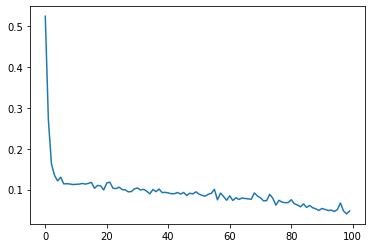

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model.history["loss"])

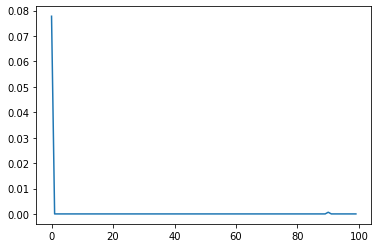

In [ ]:
plt.plot(model.history['accuracy'])

In [ ]:
# evaluate the model with testing data 
model_loss, model_accuracy=nn.evaluate(X_test_scaled, y_test, verbose=2)

327/327 - 1s - loss: 0.2939 - accuracy: 0.0000e+00 - 518ms/epoch - 2ms/step


### hyper-parameters tuning -- RandomForestClassifier

In [ ]:
# Exhaustive Grid Search 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
clf=RandomForestClassifier(random_state=42)

parameters={'n_estimators':[10,20,50,100,150],
            'criterion':['gini','entropy'],
            'max_depth':[3,6,None]}
scorer=make_scorer(fbeta_score, beta=0.05)
grid_obj=GridSearchCV(clf, parameters, scoring=scorer)
grid_obj

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                               

In [ ]:
grid_fit=grid_obj.fit(X_train_scaled, y_train)

In [ ]:
best_clf=grid_fit.best_estimator_

In [ ]:
predictions=(clf.fit(X_train_scaled, y_train)).predict(X_test_scaled)
predictions_train=(clf.fit(X_train_scaled, y_train)).predict(X_train_scaled)
best_predictions=best_clf.predict(X_test_scaled)
best_predictions_train=best_clf.predict(X_train_scaled)

# report the before vs after scores
print('------------------unoptimized mode_test-------------------')
print(f'accuracy score on testing data: {round(accuracy_score(y_test, predictions),2)}')
print(f'F-score on testing data: {round(fbeta_score(y_test, predictions, beta=0.5),2)}')
##
print('-------------unoptimized mode__train------------------')
print(f'accuracy score on training data: {round(accuracy_score(y_train, predictions_train),2)}')
print(f'F-score on training data: {round(fbeta_score(y_train, predictions_train, beta=0.5),2)}')
##
print('-----------------Optimized model_test-------------------')
print(f'accuracy score on testing data: {round(accuracy_score(y_test, best_predictions),2)}')
print(f'F-score on testing data: {round(fbeta_score(y_test, best_predictions, beta=0.5),2)}')

print('------------------Optimized model__train-------------------')
print(f'accuracy score on training data: {round(accuracy_score(y_train, best_predictions_train),2)}')
print(f'F-score on training data: {round(fbeta_score(y_train, best_predictions_train, beta=0.5),2)}')

------------------unoptimized mode_test-------------------
accuracy score on testing data: 0.51
F-score on testing data: 0.55
-------------unoptimized mode__train------------------
accuracy score on training data: 1.0
F-score on training data: 1.0
-----------------Optimized model_test-------------------
accuracy score on testing data: 0.52
F-score on testing data: 0.57
------------------Optimized model__train-------------------
accuracy score on training data: 0.56
F-score on training data: 0.59


In [ ]:
best_clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### XGboost
use regularization parameters that helps against overfitting

In [ ]:
import xgboost as xgb

In [ ]:
xgmodel=xgb.XGBClassifier(max_depth=3,n_estimators=300, learning_rate=0.05) \
    .fit(X_train_scaled, y_train)
y_pred=xgmodel.predict(X_test_scaled)
y_pred


array([ 1.,  1.,  1., ..., -1.,  1.,  1.])

In [ ]:
# model eval
accuracy=accuracy_score(y_test,y_pred )
print(accuracy)

0.5165518561040949


In [ ]:
d=[{'one':1,'two':2}]

In [ ]:
str(d).lstrip('[').rstrip(']')

"{'one': 1, 'two': 2}"